# Actividad: Regresión Lineal 2 

Alan Ricardo Vilchis Arceo - A01640260

In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split


1. Se importan los datos para observar datos faltantes, no se encuentra ninguno

In [2]:
df= pd.read_csv('/home/alanv/Documents/7/mate/breast_cancer.csv')
df.drop(['id','diagnosis'],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

2. Algunas variables regresoras no son independientes entre ellas (muestran una correlacion entre 0.95 y .1), por lo tanto los datos se estandarizaran.

In [3]:
correlacion = df.corr()
alta_corr=np.where((correlacion>0.95)&(correlacion<1))
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True) #Remplazar espacios con barrabaja
scaler= StandardScaler()
df_estandard=scaler.fit_transform(df)
df_estandard=pd.DataFrame(df_estandard,columns=df.columns)
alta_corr


(array([ 0,  0,  0,  0,  2,  2,  2,  2,  3,  3,  3,  3,  3, 10, 10, 12, 13,
        20, 20, 20, 20, 20, 22, 22, 22, 22, 22, 23, 23, 23]),
 array([ 2,  3, 20, 22,  0,  3, 20, 22,  0,  2, 20, 22, 23, 12, 13, 10, 10,
         0,  2,  3, 22, 23,  0,  2,  3, 20, 23,  3, 20, 22]))

3.Hipótesis nula de los coeficientes de regresión. Estadístico de prueba, distribución del estadístico de prueba.

Si deseamos determinar qué coeficientes son relevantes para un modelo con un 95% de confianza, es necesario tener en cuenta diversos factores. Por ejemplo, es importante conocer qué tipo de distribución tiene el estadístico de prueba. Si el estadístico de prueba es "z", esto indica que la distribución es una distribución normal estándar. Para determinar los coeficientes relevantes y establecer los límites de la región de aceptación y rechazo, necesitamos encontrar el valor de x en la gráfica. Para hacerlo, es necesario utilizar la tabla de la distribución estándar y buscar el valor de "z" correspondiente.

En este caso, al buscar un nivel de confianza del 95%, implica que el área a la izquierda y derecha de la gráfica es de 0.025 en cada lado, podemos encontrar que el valor correspondiente en la tabla de distribución estándar es de 1.96 para el lado derecho (positivo) de la gráfica. Por lo tanto, el valor correspondiente para el lado izquierdo es de -1.96. Esto nos permite establecer los límites de la región de aceptación y rechazo para determinar la relevancia de los coeficientes.


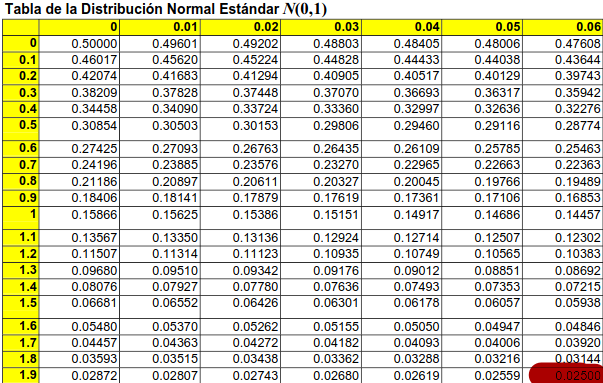



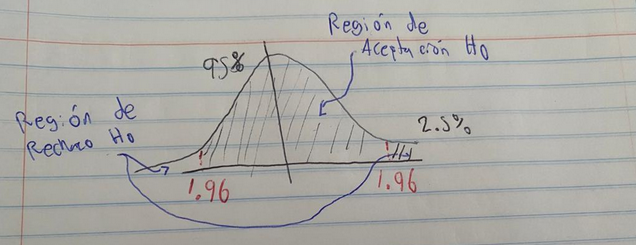

Con ayuda de esta gráfica, podemos determinar con facilidad qué coeficientes son útiles y cuáles no para el modelo. Si nuestro valor de z está entre -1.96 y 1.96, significa que está en la región de aceptación para la hipótesis nula, es decir, que el valor de beta para ese coeficiente es 0. Por lo tanto, si el valor no cumple esta condición, se encuentra en la región de rechazo y se rechaza la hipótesis nula, lo que implica que el coeficiente sí representa al modelo.

Por otro lado, si el estadístico de prueba es "t", significa que la distribución es de tipo t de Student. Por lo tanto, se deben seguir pasos similares, pero utilizando una tabla de t de Student para encontrar los límites de la región de aceptación y rechazo.

In [4]:
# Implementacion del modelo
entrenamiento, prueba = train_test_split(df_estandard,test_size=0.20,random_state=42)   
modelo=smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+concave_points_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+texture_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.987e+04
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:00:55   Log-Likelihood:                 1244.7
No. Observations:                 455   AIC:                            -2429.
Df Residuals:                     425   BIC:                            -2306.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0004      0.001      0.568      0.571      -0.001       0.002
texture_mean               -0.0016      0.003     -0.594      0.553      -0.007       0.004
perimeter_mean              0.9406      0.018     51.623      0.000       0.905       0.976
area_mean                   0.0790      0.014      5.598      0.000       0.051       0.107
smoothness_mean             0.0064      0.002      2.991      0.003       0.002       0.011
compactness_mean           -0.0577      0.005    -12.054      0.000      -0.067      -0.048
concavity_mean             -0.0338      0.006     -5.469      0.000      -0.046      -0.022
concave_points_mean        -0.0023      0.006     -0.364      0.716      -0.014       0.010
symmetry_mean               0.0034      0.002      2.188      0.029       0.000       0.006
fractal_dimension_mean      0.0080      0.003      2.637      0.009       0.002       0.014
radius_se                   0.0071      0.007      1.081      0.280      -0.006       0.020
texture_se                  0.0001      0.002      0.072      0.943      -0.003       0.003
perimeter_se               -0.0218      0.006     -3.446      0.001      -0.034      -0.009
area_se                     0.0028      0.005      0.607      0.544      -0.006       0.012
smoothness_se               0.0010      0.001      0.712      0.477      -0.002       0.004
compactness_se             -0.0019      0.003     -0.684      0.494      -0.008       0.004
concavity_se                0.0114      0.003      3.953      0.000       0.006       0.017
concave_points_se           0.0042      0.003      1.621      0.106      -0.001       0.009
symmetry_se                 0.0043      0.002      2.459      0.014       0.001       0.008
fractal_dimension_se       -0.0037      0.002     -1.623      0.105      -0.008       0.001
radius_worst                0.2303      0.019     12.435      0.000       0.194       0.267
texture_worst               0.0001      0.003      0.033      0.974      -0.006       0.007
perimeter_worst            -0.1067      0.015     -7.034      0.000      -0.137      -0.077
area_worst                 -0.0891      0.014     -6.513      0.000      -0.116      -0.062
smoothness_worst           -0.0055      0.002     -2.254      0.025      -0.010      -0.001
compactness_worst           0.0156      0.005      3.387      0.001       0.007       0.025
concavity_worst             0.0006      0.004      0.151      0.880      -0.008       0.009
concave_points_worst        0.0020      0.005      0.422      0.673      -0.007       0.011
symmetry_worst             -0.0045      0.002     -1.963      0.050      -0.009    5.98e-06
fractal_dimension_worst    -0.0033      0.003     -0.978      0.329      -0.010       0.003
===============================================

4.Hipótesis nula de la significancia del modelo (prueba F-Fisher). Menciona que distribución tiene el estadístico de prueba con qué número de grados de libertad. Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.

Una vez obtenidos los resultados, es importante analizarlos. Primero, debemos determinar si el modelo es bueno o no. Al parecer, tiene un coeficiente de determinación (R^2) perfecto y un p-valor del estadístico F de 0. Esto indica que el valor del estadístico F es relevante, ya que está por debajo de 0.05. Al buscar un modelo con un 95% de confianza, el valor alto del estadístico F (en este caso, 59870) representa la contribución de las variables independientes en la construcción del modelo. Cuanto mayor sea este número, mejor.

Por otro lado, también debemos considerar el tipo de distribución que tiene el estadístico de prueba, que en este caso es "t". Esto implica que sigue una distribución t de Student. Es esencial conocer los grados de libertad, que generalmente se calculan restando uno al número de observaciones. Dado que la base de datos tiene 569 observaciones, los grados de libertad son 568. A diferencia de la distribución normal estándar, aquí se necesita una tabla específica para el tamaño de la región de rechazo de la hipótesis nula. Dado que la confiabilidad sigue siendo del 95%, el área de la región de aceptación es la misma (0.025 en cada lado).

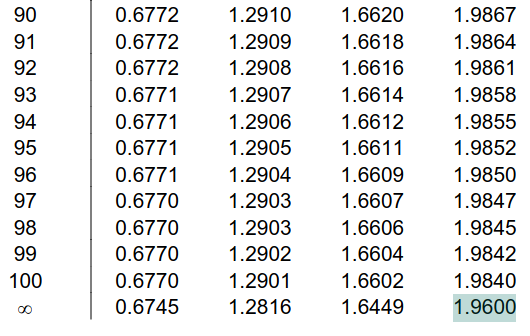

En esta tabla, la cuarta columna se refiere al área de la región de rechazo de 0.025, y la última fila corresponde al número de grados de libertad. Dado que el valor utilizado para este modelo es mayor a 100, se toma ese valor, que curiosamente es el mismo que para la distribución normal estándar con la misma confiabilidad.

Esto es útil para aplicar el enfoque de eliminación de variables (backward). Basándonos en este modelo, se sabe que el primer coeficiente a eliminar es el de "texture_worst", con un p-valor de 0.974 (mayor a 0.05 y el más alto de todas las variables), o un valor "t" de 0.033 (cercano a 0). Esto se representa con la siguiente gráfica.

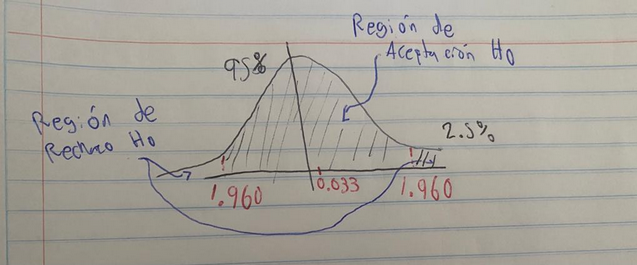

Esto quiere decir que, el valor "t" de 0.033 se encuentra en la región de aceptación de la hipótesis nula. Por lo tanto, el valor del coeficiente para la variable anteriormente mencionada es 0.



5. Realiza un modelo de regresión hacia atrás (backward). Explica el criterio para ir eliminando variables del modelo.

El modelo de regresión backward consiste en ir eliminando las variables con un p valor mayor a 0.05, sin embargo esas variables se eliminan una por una comenzando con la que tiene el p valor mas grande.

In [5]:
# se elimina texture_worst (0.974)
modelo=smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+concave_points_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.215e+04
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:00:55   Log-Likelihood:                 1244.7
No. Observations:                 455   AIC:                            -2431.
Df Residuals:                     426   BIC:                            -2312.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0004      0.001      0.569      0.570      -0.001       0.002
texture_mean               -0.0015      0.001     -1.525      0.128      -0.003       0.000
perimeter_mean              0.9405      0.018     52.488      0.000       0.905       0.976
area_mean                   0.0791      0.014      5.645      0.000       0.052       0.107
smoothness_mean             0.0064      0.002      3.001      0.003       0.002       0.011
compactness_mean           -0.0577      0.005    -12.074      0.000      -0.067      -0.048
concavity_mean             -0.0338      0.006     -5.475      0.000      -0.046      -0.022
concave_points_mean        -0.0023      0.006     -0.365      0.715      -0.014       0.010
symmetry_mean               0.0034      0.002      2.218      0.027       0.000       0.006
fractal_dimension_mean      0.0080      0.003      2.646      0.008       0.002       0.014
radius_se                   0.0071      0.006      1.090      0.276      -0.006       0.020
texture_se                  0.0002      0.001      0.134      0.893      -0.002       0.002
perimeter_se               -0.0218      0.006     -3.450      0.001      -0.034      -0.009
area_se                     0.0029      0.005      0.621      0.535      -0.006       0.012
smoothness_se               0.0010      0.001      0.716      0.474      -0.002       0.004
compactness_se             -0.0019      0.003     -0.685      0.494      -0.007       0.004
concavity_se                0.0114      0.003      3.958      0.000       0.006       0.017
concave_points_se           0.0042      0.003      1.630      0.104      -0.001       0.009
symmetry_se                 0.0043      0.002      2.589      0.010       0.001       0.008
fractal_dimension_se       -0.0037      0.002     -1.625      0.105      -0.008       0.001
radius_worst                0.2304      0.018     12.580      0.000       0.194       0.266
perimeter_worst            -0.1067      0.015     -7.050      0.000      -0.136      -0.077
area_worst                 -0.0892      0.014     -6.601      0.000      -0.116      -0.063
smoothness_worst           -0.0055      0.002     -2.300      0.022      -0.010      -0.001
compactness_worst           0.0156      0.005      3.393      0.001       0.007       0.025
concavity_worst             0.0006      0.004      0.151      0.880      -0.008       0.009
concave_points_worst        0.0020      0.005      0.431      0.667      -0.007       0.011
symmetry_worst             -0.0045      0.002     -2.043      0.042      -0.009      -0.000
fractal_dimension_worst    -0.0033      0.003     -0.980      0.328      -0.010       0.003
==============================================================================
Omnibus:                       46.581   Durbin-Watson:      

In [6]:
# ahora se borra texture_se (0.893)
modelo=smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+concave_points_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concavity_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.460e+04
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:00:55   Log-Likelihood:                 1244.7
No. Observations:                 455   AIC:                            -2433.
Df Residuals:                     427   BIC:                            -2318.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0004      0.001      0.568      0.570      -0.001       0.002
texture_mean               -0.0014      0.001     -1.667      0.096      -0.003       0.000
perimeter_mean              0.9407      0.018     52.757      0.000       0.906       0.976
area_mean                   0.0789      0.014      5.663      0.000       0.052       0.106
smoothness_mean             0.0064      0.002      3.017      0.003       0.002       0.011
compactness_mean           -0.0578      0.005    -12.237      0.000      -0.067      -0.048
concavity_mean             -0.0338      0.006     -5.481      0.000      -0.046      -0.022
concave_points_mean        -0.0022      0.006     -0.364      0.716      -0.014       0.010
symmetry_mean               0.0034      0.001      2.286      0.023       0.000       0.006
fractal_dimension_mean      0.0080      0.003      2.654      0.008       0.002       0.014
radius_se                   0.0071      0.006      1.094      0.274      -0.006       0.020
perimeter_se               -0.0217      0.006     -3.461      0.001      -0.034      -0.009
area_se                     0.0028      0.005      0.608      0.544      -0.006       0.012
smoothness_se               0.0010      0.001      0.719      0.472      -0.002       0.004
compactness_se             -0.0019      0.003     -0.682      0.496      -0.007       0.004
concavity_se                0.0114      0.003      3.964      0.000       0.006       0.017
concave_points_se           0.0042      0.003      1.626      0.105      -0.001       0.009
symmetry_se                 0.0044      0.002      2.736      0.006       0.001       0.008
fractal_dimension_se       -0.0036      0.002     -1.623      0.105      -0.008       0.001
radius_worst                0.2303      0.018     12.604      0.000       0.194       0.266
perimeter_worst            -0.1068      0.015     -7.082      0.000      -0.136      -0.077
area_worst                 -0.0890      0.013     -6.637      0.000      -0.115      -0.063
smoothness_worst           -0.0055      0.002     -2.301      0.022      -0.010      -0.001
compactness_worst           0.0156      0.005      3.403      0.001       0.007       0.025
concavity_worst             0.0006      0.004      0.145      0.885      -0.008       0.009
concave_points_worst        0.0021      0.005      0.437      0.662      -0.007       0.011
symmetry_worst             -0.0046      0.002     -2.128      0.034      -0.009      -0.000
fractal_dimension_worst    -0.0033      0.003     -0.982      0.327      -0.010       0.003
==============================================================================
Omnibus:                       46.713   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              17

In [7]:
# Sigue concavity_worst (0.885)
modelo=smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+concave_points_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.724e+04
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:00:55   Log-Likelihood:                 1244.7
No. Observations:                 455   AIC:                            -2435.
Df Residuals:                     428   BIC:                            -2324.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0004      0.001      0.572      0.567      -0.001       0.002
texture_mean               -0.0014      0.001     -1.673      0.095      -0.003       0.000
perimeter_mean              0.9408      0.018     52.870      0.000       0.906       0.976
area_mean                   0.0788      0.014      5.670      0.000       0.051       0.106
smoothness_mean             0.0065      0.002      3.056      0.002       0.002       0.011
compactness_mean           -0.0579      0.005    -12.549      0.000      -0.067      -0.049
concavity_mean             -0.0333      0.005     -6.640      0.000      -0.043      -0.023
concave_points_mean        -0.0026      0.006     -0.443      0.658      -0.014       0.009
symmetry_mean               0.0034      0.001      2.290      0.023       0.000       0.006
fractal_dimension_mean      0.0080      0.003      2.657      0.008       0.002       0.014
radius_se                   0.0071      0.006      1.099      0.272      -0.006       0.020
perimeter_se               -0.0217      0.006     -3.463      0.001      -0.034      -0.009
area_se                     0.0027      0.005      0.596      0.552      -0.006       0.012
smoothness_se               0.0010      0.001      0.715      0.475      -0.002       0.004
compactness_se             -0.0019      0.003     -0.684      0.495      -0.007       0.004
concavity_se                0.0115      0.003      4.161      0.000       0.006       0.017
concave_points_se           0.0042      0.003      1.622      0.105      -0.001       0.009
symmetry_se                 0.0044      0.002      2.752      0.006       0.001       0.008
fractal_dimension_se       -0.0037      0.002     -1.702      0.089      -0.008       0.001
radius_worst                0.2302      0.018     12.621      0.000       0.194       0.266
perimeter_worst            -0.1068      0.015     -7.088      0.000      -0.136      -0.077
area_worst                 -0.0889      0.013     -6.646      0.000      -0.115      -0.063
smoothness_worst           -0.0055      0.002     -2.305      0.022      -0.010      -0.001
compactness_worst           0.0158      0.004      3.643      0.000       0.007       0.024
concave_points_worst        0.0023      0.004      0.513      0.608      -0.006       0.011
symmetry_worst             -0.0046      0.002     -2.149      0.032      -0.009      -0.000
fractal_dimension_worst    -0.0032      0.003     -0.976      0.330      -0.010       0.003
==============================================================================
Omnibus:                       47.075   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.629
Skew:                           0.368   Prob(JB):                     9.86e-40
Kurtosi

In [8]:
# eliminamos concave_points_mean (0.658)
modelo=smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+concave_points_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.006e+04
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:00:56   Log-Likelihood:                 1244.6
No. Observations:                 455   AIC:                            -2437.
Df Residuals:                     429   BIC:                            -2330.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0005      0.001      0.592      0.554      -0.001       0.002
texture_mean               -0.0014      0.001     -1.659      0.098      -0.003       0.000
perimeter_mean              0.9412      0.018     52.994      0.000       0.906       0.976
area_mean                   0.0779      0.014      5.670      0.000       0.051       0.105
smoothness_mean             0.0062      0.002      3.053      0.002       0.002       0.010
compactness_mean           -0.0582      0.005    -12.805      0.000      -0.067      -0.049
concavity_mean             -0.0348      0.004     -9.476      0.000      -0.042      -0.028
symmetry_mean               0.0034      0.001      2.285      0.023       0.000       0.006
fractal_dimension_mean      0.0080      0.003      2.662      0.008       0.002       0.014
radius_se                   0.0066      0.006      1.040      0.299      -0.006       0.019
perimeter_se               -0.0214      0.006     -3.440      0.001      -0.034      -0.009
area_se                     0.0030      0.004      0.681      0.496      -0.006       0.012
smoothness_se               0.0010      0.001      0.690      0.491      -0.002       0.004
compactness_se             -0.0021      0.003     -0.753      0.452      -0.008       0.003
concavity_se                0.0121      0.002      5.086      0.000       0.007       0.017
concave_points_se           0.0041      0.003      1.593      0.112      -0.001       0.009
symmetry_se                 0.0044      0.002      2.744      0.006       0.001       0.007
fractal_dimension_se       -0.0037      0.002     -1.706      0.089      -0.008       0.001
radius_worst                0.2304      0.018     12.647      0.000       0.195       0.266
perimeter_worst            -0.1072      0.015     -7.130      0.000      -0.137      -0.078
area_worst                 -0.0887      0.013     -6.643      0.000      -0.115      -0.062
smoothness_worst           -0.0054      0.002     -2.270      0.024      -0.010      -0.001
compactness_worst           0.0164      0.004      3.950      0.000       0.008       0.025
concave_points_worst        0.0013      0.004      0.343      0.732      -0.006       0.009
symmetry_worst             -0.0046      0.002     -2.147      0.032      -0.009      -0.000
fractal_dimension_worst    -0.0032      0.003     -0.971      0.332      -0.010       0.003
==============================================================================
Omnibus:                       47.012   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.300
Skew:                           0.363   Prob(JB):                     4.28e-40
Kurtosis:                       6.006   Cond. No.                         125.
====================

In [9]:
# eliminamos concave_points_worst (0.658)
modelo=smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+area_se+smoothness_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.313e+04
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:00:56   Log-Likelihood:                 1244.5
No. Observations:                 455   AIC:                            -2439.
Df Residuals:                     430   BIC:                            -2336.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0004      0.001      0.588      0.557      -0.001       0.002
texture_mean               -0.0014      0.001     -1.690      0.092      -0.003       0.000
perimeter_mean              0.9398      0.017     54.361      0.000       0.906       0.974
area_mean                   0.0789      0.013      5.870      0.000       0.052       0.105
smoothness_mean             0.0061      0.002      3.038      0.003       0.002       0.010
compactness_mean           -0.0582      0.005    -12.817      0.000      -0.067      -0.049
concavity_mean             -0.0342      0.003    -10.462      0.000      -0.041      -0.028
symmetry_mean               0.0034      0.001      2.277      0.023       0.000       0.006
fractal_dimension_mean      0.0080      0.003      2.662      0.008       0.002       0.014
radius_se                   0.0064      0.006      1.008      0.314      -0.006       0.019
perimeter_se               -0.0217      0.006     -3.498      0.001      -0.034      -0.009
area_se                     0.0033      0.004      0.765      0.445      -0.005       0.012
smoothness_se               0.0009      0.001      0.634      0.526      -0.002       0.004
compactness_se             -0.0023      0.003     -0.823      0.411      -0.008       0.003
concavity_se                0.0118      0.002      5.305      0.000       0.007       0.016
concave_points_se           0.0047      0.002      2.663      0.008       0.001       0.008
symmetry_se                 0.0044      0.002      2.736      0.006       0.001       0.007
fractal_dimension_se       -0.0037      0.002     -1.719      0.086      -0.008       0.001
radius_worst                0.2319      0.018     13.120      0.000       0.197       0.267
perimeter_worst            -0.1068      0.015     -7.132      0.000      -0.136      -0.077
area_worst                 -0.0899      0.013     -6.954      0.000      -0.115      -0.064
smoothness_worst           -0.0052      0.002     -2.258      0.024      -0.010      -0.001
compactness_worst           0.0168      0.004      4.187      0.000       0.009       0.025
symmetry_worst             -0.0045      0.002     -2.126      0.034      -0.009      -0.000
fractal_dimension_worst    -0.0031      0.003     -0.968      0.334      -0.010       0.003
==============================================================================
Omnibus:                       46.173   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.204
Skew:                           0.349   Prob(JB):                     1.22e-39
Kurtosis:                       5.994   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assum

In [10]:
# smoothness_se (0.526)
modelo=smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+area_se+compactness_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.642e+04
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:00:56   Log-Likelihood:                 1244.3
No. Observations:                 455   AIC:                            -2441.
Df Residuals:                     431   BIC:                            -2342.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0004      0.001      0.587      0.558      -0.001       0.002
texture_mean               -0.0014      0.001     -1.642      0.101      -0.003       0.000
perimeter_mean              0.9393      0.017     54.425      0.000       0.905       0.973
area_mean                   0.0797      0.013      5.960      0.000       0.053       0.106
smoothness_mean             0.0058      0.002      2.976      0.003       0.002       0.010
compactness_mean           -0.0583      0.005    -12.834      0.000      -0.067      -0.049
concavity_mean             -0.0341      0.003    -10.452      0.000      -0.041      -0.028
symmetry_mean               0.0035      0.001      2.369      0.018       0.001       0.006
fractal_dimension_mean      0.0081      0.003      2.689      0.007       0.002       0.014
radius_se                   0.0069      0.006      1.100      0.272      -0.005       0.019
perimeter_se               -0.0221      0.006     -3.605      0.000      -0.034      -0.010
area_se                     0.0033      0.004      0.751      0.453      -0.005       0.012
compactness_se             -0.0018      0.003     -0.669      0.504      -0.007       0.003
concavity_se                0.0116      0.002      5.273      0.000       0.007       0.016
concave_points_se           0.0048      0.002      2.758      0.006       0.001       0.008
symmetry_se                 0.0047      0.002      3.080      0.002       0.002       0.008
fractal_dimension_se       -0.0037      0.002     -1.711      0.088      -0.008       0.001
radius_worst                0.2308      0.018     13.130      0.000       0.196       0.265
perimeter_worst            -0.1060      0.015     -7.109      0.000      -0.135      -0.077
area_worst                 -0.0900      0.013     -6.968      0.000      -0.115      -0.065
smoothness_worst           -0.0043      0.002     -2.358      0.019      -0.008      -0.001
compactness_worst           0.0163      0.004      4.143      0.000       0.009       0.024
symmetry_worst             -0.0049      0.002     -2.400      0.017      -0.009      -0.001
fractal_dimension_worst    -0.0032      0.003     -0.999      0.318      -0.010       0.003
==============================================================================
Omnibus:                       46.971   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.243
Skew:                           0.351   Prob(JB):                     3.61e-41
Kurtosis:                       6.055   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# compactness_se (0.504	)
modelo=smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+area_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.999e+04
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:00:56   Log-Likelihood:                 1244.1
No. Observations:                 455   AIC:                            -2442.
Df Residuals:                     432   BIC:                            -2347.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0004      0.001      0.584      0.560      -0.001       0.002
texture_mean               -0.0014      0.001     -1.656      0.098      -0.003       0.000
perimeter_mean              0.9392      0.017     54.455      0.000       0.905       0.973
area_mean                   0.0797      0.013      5.965      0.000       0.053       0.106
smoothness_mean             0.0060      0.002      3.110      0.002       0.002       0.010
compactness_mean           -0.0590      0.004    -13.376      0.000      -0.068      -0.050
concavity_mean             -0.0336      0.003    -10.579      0.000      -0.040      -0.027
symmetry_mean               0.0035      0.001      2.337      0.020       0.001       0.006
fractal_dimension_mean      0.0082      0.003      2.769      0.006       0.002       0.014
radius_se                   0.0072      0.006      1.163      0.246      -0.005       0.019
perimeter_se               -0.0225      0.006     -3.691      0.000      -0.035      -0.011
area_se                     0.0032      0.004      0.747      0.456      -0.005       0.012
concavity_se                0.0111      0.002      5.330      0.000       0.007       0.015
concave_points_se           0.0047      0.002      2.712      0.007       0.001       0.008
symmetry_se                 0.0044      0.001      3.010      0.003       0.002       0.007
fractal_dimension_se       -0.0045      0.002     -2.462      0.014      -0.008      -0.001
radius_worst                0.2309      0.018     13.145      0.000       0.196       0.265
perimeter_worst            -0.1051      0.015     -7.082      0.000      -0.134      -0.076
area_worst                 -0.0906      0.013     -7.032      0.000      -0.116      -0.065
smoothness_worst           -0.0043      0.002     -2.389      0.017      -0.008      -0.001
compactness_worst           0.0151      0.003      4.365      0.000       0.008       0.022
symmetry_worst             -0.0046      0.002     -2.321      0.021      -0.009      -0.001
fractal_dimension_worst    -0.0027      0.003     -0.856      0.393      -0.009       0.003
==============================================================================
Omnibus:                       47.035   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.849
Skew:                           0.353   Prob(JB):                     4.40e-41
Kurtosis:                       6.050   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# area_se 0.456
modelo=smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst+fractal_dimension_worst', data=entrenamiento)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.389e+04
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:00:56   Log-Likelihood:                 1243.8
No. Observations:                 455   AIC:                            -2444.
Df Residuals:                     433   BIC:                            -2353.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0005      0.001      0.596      0.552      -0.001       0.002
texture_mean               -0.0015      0.001     -1.716      0.087      -0.003       0.000
perimeter_mean              0.9437      0.016     58.337      0.000       0.912       0.975
area_mean                   0.0778      0.013      5.934      0.000       0.052       0.104
smoothness_mean             0.0061      0.002      3.167      0.002       0.002       0.010
compactness_mean           -0.0593      0.004    -13.482      0.000      -0.068      -0.051
concavity_mean             -0.0337      0.003    -10.617      0.000      -0.040      -0.027
symmetry_mean               0.0033      0.001      2.250      0.025       0.000       0.006
fractal_dimension_mean      0.0080      0.003      2.696      0.007       0.002       0.014
radius_se                   0.0090      0.006      1.570      0.117      -0.002       0.020
perimeter_se               -0.0211      0.006     -3.640      0.000      -0.033      -0.010
concavity_se                0.0113      0.002      5.445      0.000       0.007       0.015
concave_points_se           0.0044      0.002      2.610      0.009       0.001       0.008
symmetry_se                 0.0041      0.001      2.920      0.004       0.001       0.007
fractal_dimension_se       -0.0046      0.002     -2.506      0.013      -0.008      -0.001
radius_worst                0.2260      0.016     13.860      0.000       0.194       0.258
perimeter_worst            -0.1079      0.014     -7.519      0.000      -0.136      -0.080
area_worst                 -0.0852      0.011     -8.000      0.000      -0.106      -0.064
smoothness_worst           -0.0043      0.002     -2.350      0.019      -0.008      -0.001
compactness_worst           0.0153      0.003      4.441      0.000       0.009       0.022
symmetry_worst             -0.0043      0.002     -2.205      0.028      -0.008      -0.000
fractal_dimension_worst    -0.0025      0.003     -0.794      0.427      -0.009       0.004
==============================================================================
Omnibus:                       46.538   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.549
Skew:                           0.324   Prob(JB):                     9.36e-43
Kurtosis:                       6.129   Cond. No.                         99.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# fractal_dimension_worst (0.427)
modelo=smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+radius_se+perimeter_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst', data=entrenamiento)
modelo = modelo.fit()
modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.815e+04
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:00:57   Log-Likelihood:                 1243.4
No. Observations:                 455   AIC:                            -2445.
Df Residuals:                     434   BIC:                            -2358.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0004      0.001      0.585      0.559      -0.001       0.002
texture_mean              -0.0015      0.001     -1.719      0.086      -0.003       0.000
perimeter_mean             0.9438      0.016     58.371      0.000       0.912       0.976
area_mean                  0.0777      0.013      5.927      0.000       0.052       0.103
smoothness_mean            0.0062      0.002      3.201      0.001       0.002       0.010
compactness_mean          -0.0579      0.004    -14.215      0.000      -0.066      -0.050
concavity_mean            -0.0341      0.003    -10.870      0.000      -0.040      -0.028
symmetry_mean              0.0033      0.001      2.279      0.023       0.000       0.006
fractal_dimension_mean     0.0065      0.002      2.775      0.006       0.002       0.011
radius_se                  0.0096      0.006      1.677      0.094      -0.002       0.021
perimeter_se              -0.0217      0.006     -3.766      0.000      -0.033      -0.010
concavity_se               0.0117      0.002      5.744      0.000       0.008       0.016
concave_points_se          0.0045      0.002      2.679      0.008       0.001       0.008
symmetry_se                0.0044      0.001      3.272      0.001       0.002       0.007
fractal_dimension_se      -0.0053      0.002     -3.254      0.001      -0.008      -0.002
radius_worst               0.2239      0.016     13.928      0.000       0.192       0.255
perimeter_worst           -0.1065      0.014     -7.481      0.000      -0.135      -0.079
area_worst                -0.0844      0.011     -7.965      0.000      -0.105      -0.064
smoothness_worst          -0.0045      0.002     -2.514      0.012      -0.008      -0.001
compactness_worst          0.0134      0.003      5.309      0.000       0.008       0.018
symmetry_worst            -0.0045      0.002     -2.390      0.017      -0.008      -0.001
==============================================================================
Omnibus:                       46.789   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.772
Skew:                           0.310   Prob(JB):                     1.53e-44
Kurtosis:                       6.203   Cond. No.                         98.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# radius_se 0.094
modelo=smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst', data=entrenamiento)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.241e+04
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:00:57   Log-Likelihood:                 1242.0
No. Observations:                 455   AIC:                            -2444.
Df Residuals:                     435   BIC:                            -2362.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0004      0.001      0.570      0.569      -0.001       0.002
texture_mean              -0.0015      0.001     -1.746      0.082      -0.003       0.000
perimeter_mean             0.9413      0.016     58.341      0.000       0.910       0.973
area_mean                  0.0778      0.013      5.928      0.000       0.052       0.104
smoothness_mean            0.0067      0.002      3.514      0.000       0.003       0.010
compactness_mean          -0.0576      0.004    -14.124      0.000      -0.066      -0.050
concavity_mean            -0.0332      0.003    -10.718      0.000      -0.039      -0.027
symmetry_mean              0.0037      0.001      2.545      0.011       0.001       0.007
fractal_dimension_mean     0.0056      0.002      2.450      0.015       0.001       0.010
perimeter_se              -0.0125      0.002     -6.903      0.000      -0.016      -0.009
concavity_se               0.0117      0.002      5.743      0.000       0.008       0.016
concave_points_se          0.0039      0.002      2.357      0.019       0.001       0.007
symmetry_se                0.0046      0.001      3.419      0.001       0.002       0.007
fractal_dimension_se      -0.0045      0.002     -2.891      0.004      -0.008      -0.001
radius_worst               0.2403      0.013     18.781      0.000       0.215       0.265
perimeter_worst           -0.1212      0.011    -10.742      0.000      -0.143      -0.099
area_worst                -0.0843      0.011     -7.936      0.000      -0.105      -0.063
smoothness_worst          -0.0045      0.002     -2.492      0.013      -0.008      -0.001
compactness_worst          0.0132      0.003      5.230      0.000       0.008       0.018
symmetry_worst            -0.0049      0.002     -2.575      0.010      -0.009      -0.001
==============================================================================
Omnibus:                       48.857   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.951
Skew:                           0.279   Prob(JB):                     1.30e-52
Kurtosis:                       6.506   Cond. No.                         93.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#  texture_mean 0.082
modelo=smf.ols(formula='radius_mean~perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+symmetry_mean+fractal_dimension_mean+perimeter_se+concavity_se+concave_points_se+symmetry_se+fractal_dimension_se+radius_worst+perimeter_worst+area_worst+smoothness_worst+compactness_worst+symmetry_worst', data=entrenamiento)
modelo = modelo.fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            radius_mean   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.709e+04
Date:                Thu, 31 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:00:57   Log-Likelihood:                 1240.4
No. Observations:                 455   AIC:                            -2443.
Df Residuals:                     436   BIC:                            -2364.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0005      0.001      0.614      0.539      -0.001       0.002
perimeter_mean             0.9426      0.016     58.345      0.000       0.911       0.974
area_mean                  0.0773      0.013      5.877      0.000       0.051       0.103
smoothness_mean            0.0072      0.002      3.808      0.000       0.003       0.011
compactness_mean          -0.0576      0.004    -14.074      0.000      -0.066      -0.050
concavity_mean            -0.0336      0.003    -10.827      0.000      -0.040      -0.027
symmetry_mean              0.0034      0.001      2.384      0.018       0.001       0.006
fractal_dimension_mean     0.0059      0.002      2.574      0.010       0.001       0.010
perimeter_se              -0.0126      0.002     -6.924      0.000      -0.016      -0.009
concavity_se               0.0118      0.002      5.813      0.000       0.008       0.016
concave_points_se          0.0038      0.002      2.294      0.022       0.001       0.007
symmetry_se                0.0044      0.001      3.265      0.001       0.002       0.007
fractal_dimension_se      -0.0045      0.002     -2.885      0.004      -0.008      -0.001
radius_worst               0.2381      0.013     18.656      0.000       0.213       0.263
perimeter_worst           -0.1208      0.011    -10.687      0.000      -0.143      -0.099
area_worst                -0.0833      0.011     -7.834      0.000      -0.104      -0.062
smoothness_worst          -0.0048      0.002     -2.682      0.008      -0.008      -0.001
compactness_worst          0.0127      0.003      5.042      0.000       0.008       0.018
symmetry_worst            -0.0045      0.002     -2.367      0.018      -0.008      -0.001
==============================================================================
Omnibus:                       51.388   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.014
Skew:                           0.269   Prob(JB):                     1.16e-60
Kurtosis:                       6.777   Cond. No.                         93.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

6. Comparación entre datos reales y predicción. Análisis de los resultados.

Para observar la distinción entre los datos predichos y los datos reales, se creó un gráfico de dispersión (scatter plot) para el atributo 'radius_mean' (variable dependiente). Se compararon los datos predichos por el modelo con los datos reales que se utilizaron para construir el modelo. Se utilizó el último modelo obtenido mediante el análisis backwards. 

Al observar la tercera gráfica, se puede notar una alta precisión al diferenciar los conjuntos de datos. Sin embargo, la información no se aprecia con claridad debido al agrupamiento de los datos.


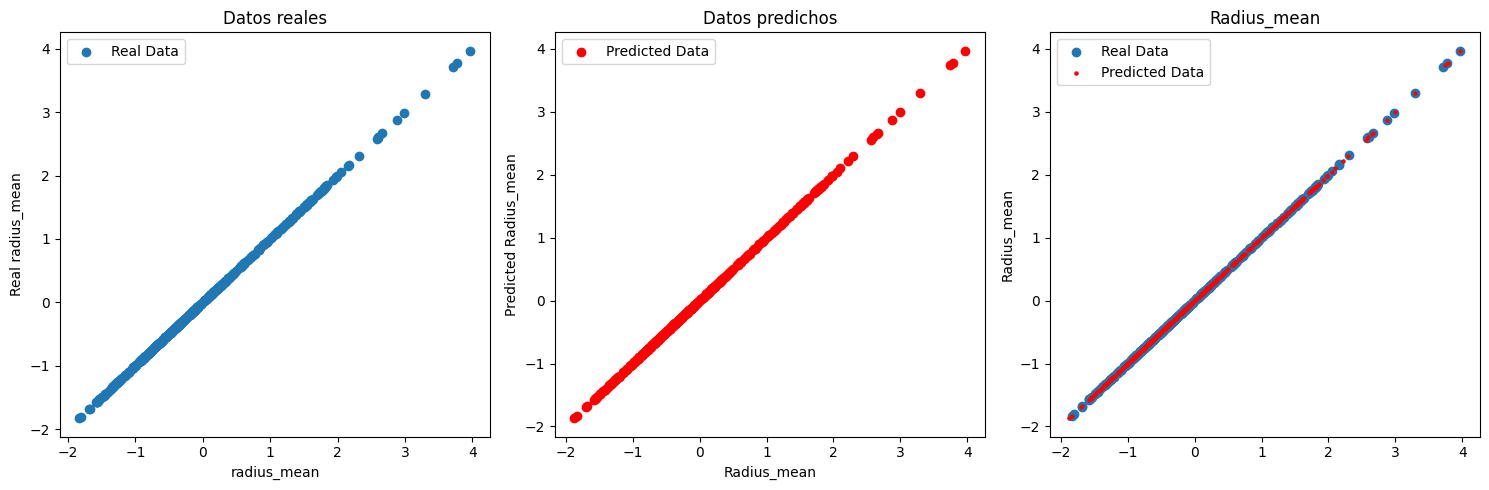

In [40]:
# Create a figure and an array of subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Scatter plot Real Data
axs[0].scatter(entrenamiento['radius_mean'], entrenamiento['radius_mean'], label='Real Data')
axs[0].set_xlabel('radius_mean')
axs[0].set_ylabel('Real radius_mean')
axs[0].set_title('Datos reales')
axs[0].legend()

# Plot 2: Scatter plot Predicted Data
errors = entrenamiento['radius_mean'] - predictions
axs[1].scatter(predictions, predictions, color='red', label='Predicted Data')
axs[1].set_xlabel('Radius_mean')
axs[1].set_ylabel('Predicted Radius_mean')
axs[1].set_title('Datos predichos')
axs[1].legend()

# Plot 3: Scatter plot Real and Predicted data
axs[2].scatter(entrenamiento['radius_mean'], entrenamiento['radius_mean'], label='Real Data')
axs[2].scatter(predictions, predictions, color='red', label='Predicted Data', s=5)
axs[2].set_ylabel('Radius_mean')
axs[2].set_title('Radius_mean')
axs[2].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

Se optó por graficar los errores para visualizar los datos de una manera más clara. Aquí se observa que los errores máximos son de menos de 0.1. Estos valores cercanos a 0 permiten inferir que el modelo representa bien los datos. Además, en cada iteración del análisis backwards, el valor del estadístico F aumentó: comenzó en 59870 y finalizó en 97090. Esto indica que el modelo mejoró con cada iteración.

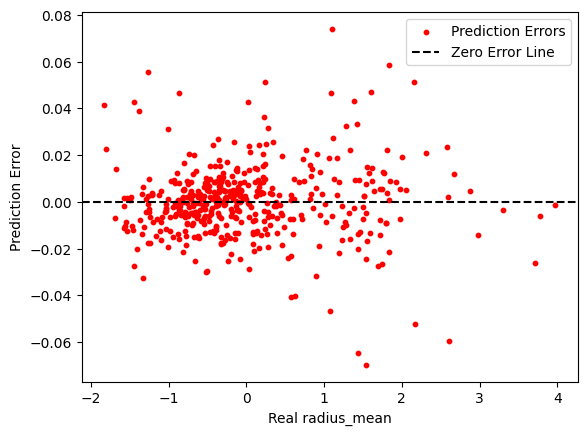

In [27]:
errors = entrenamiento['radius_mean'] - predictions  # Calculate the errors

plt.scatter(entrenamiento['radius_mean'], errors, color='red', label='Prediction Errors', s=10)
plt.axhline(y=0, color='black', linestyle='--', label='Zero Error Line')  # Zero error reference line
plt.xlabel('Real radius_mean')
plt.ylabel('Prediction Error')
plt.legend()
plt.show()